<a href="https://colab.research.google.com/github/bonitr02/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HHA 507 Week 6b: Regression Analysis

## Import packages

In [68]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import linear_model

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

## Load Dataset #1

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/bonitr02/datasci_6_regression/main/datasets/dataset_2190_cholesterol.csv')
len(df)
#303 initial values

303

### Look for missingness

In [5]:
# Handling whitespace as missing data
df.replace(" ", pd.NA, inplace=True)

In [6]:
## keep only complete rows
df = df.dropna()
len(df)
#no rows dropped

303

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num', 'chol'],
      dtype='object')

In [8]:
df.dtypes
#Interested in thalach and chol for simple linear regression

age           int64
sex           int64
cp            int64
trestbps      int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
chol          int64
dtype: object

## Load Dataset #2

In [20]:
df2 = pd.read_csv('https://raw.githubusercontent.com/bonitr02/datasci_6_regression/main/datasets/diabetes%202.csv')
len(df2)
#768 initial values

768

### Look for missingness

In [21]:
# Handling whitespace as missing data
df2.replace(" ", pd.NA, inplace=True)

In [22]:
## keep only complete rows
df2 = df2.dropna()
len(df2)
#no rows dropped

768

In [23]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
df2.dtypes
#Interested in Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [25]:
df = df.replace(',', '', regex=True)
df2 = df2.replace(',', '', regex=True)

## Simple Linear Regression

In [26]:
# Fit the regression model
# thalach = independent variable(x); chol = dependent variable (y)
X = sm.add_constant(df['thalach'])  # Adds a constant term to the predictor
model = sm.OLS(df['chol'], X).fit()

<Axes: xlabel='thalach', ylabel='chol'>

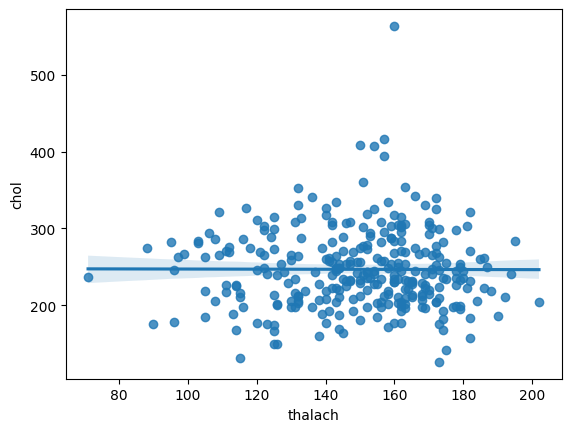

In [79]:
sns.regplot(data=df, x='thalach', y='chol')

In [28]:
# Extract model parameters
slope = model.params['thalach']
intercept = model.params['const']
r_squared = model.rsquared

# Display results
print(f"Slope (Coefficient for Thalach): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_squared:.2f}")

# For a detailed summary:
print(model.summary())

# If you want to display predictions for the first 5 individuals
predictions = model.predict(X)
print("\nPredicted Cholesterol for the first 5 individuals:")
for i, prediction in enumerate(predictions[:5]):
    print(f"Individual {i + 1}: {prediction:.2f}")

Slope (Coefficient for Thalach): -0.01
Intercept: 247.86
R-squared value: 0.00
                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.003545
Date:                Sun, 12 Nov 2023   Prob (F-statistic):              0.953
Time:                        13:55:01   Log-Likelihood:                -1625.4
No. Observations:                 303   AIC:                             3255.
Df Residuals:                     301   BIC:                             3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

### Checking Assumptions - Performed After Regression Analysis
- Linearity of data
- Normality of residuals
- Homogeneity of residuals

In [29]:
residuals = model.resid
fitted = model.fittedvalues

In [30]:
### Assessing linearity of the relationship
# insignificant p-value indicates linearity
stat, p_value = linear_rainbow(model)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9072457382116685, p-value=0.7246088250372337


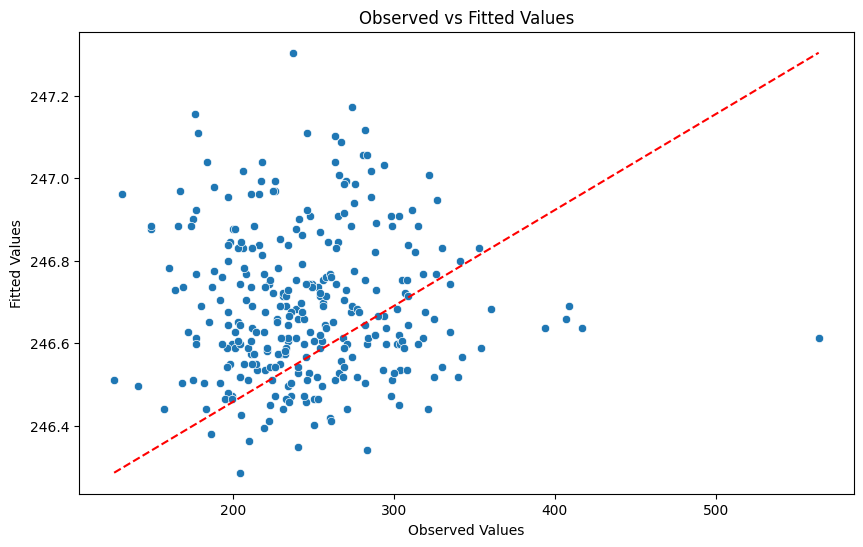

In [ ]:
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['chol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['chol']), max(df['chol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [ ]:
### Assessing normality of the residuals
# insignificant p value indicates a normal distribution
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.947238564491272, p-value=5.888153076227809e-09


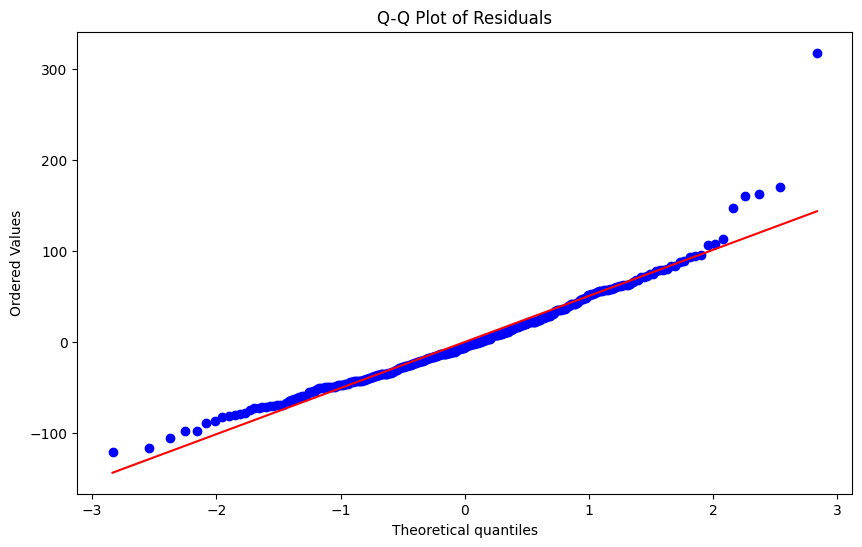

In [ ]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [31]:
##### Assessing the homogeneity of variance of the residuals

gq_test = het_goldfeldquandt(residuals, model.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

## Goldfeld-Quandt Test: The Goldfeld-Quandt test is another test used to assess homoscedasticity.
## It divides the data into two groups and compares the variance of the residuals in the two groups.

Goldfeld-Quandt Test: F-statistic=1.2583929885790026, p-value=0.08052171935327797


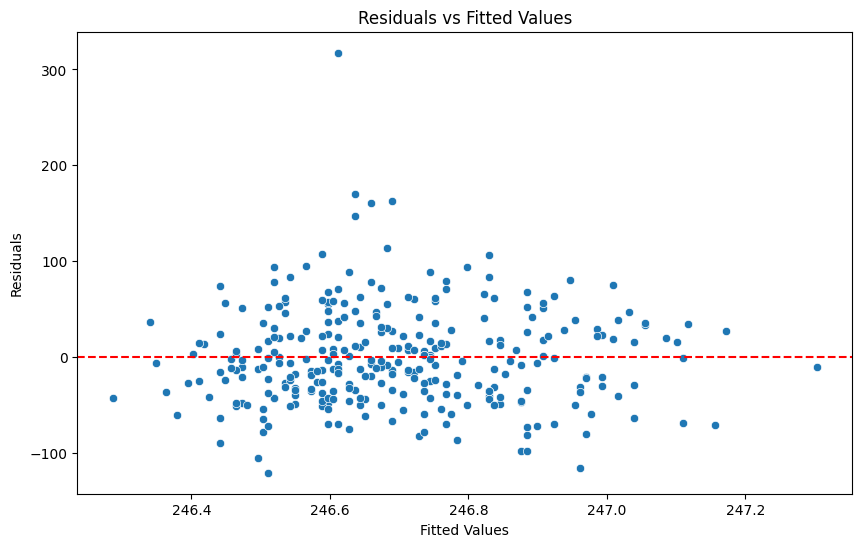

In [ ]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Model Evaluation

R-squared: 0%
- Indicates that 0% of the variance in cholesterol (dependent variable) is being explained by the maximum heart rate/thalach (independent variable)

Discuss the model's adequacy in predicting the dependent variable:
- Linearity: insiginifant p-value indicates linearity (pass)
- Normality: signifiant p-value indicates an abnormal distribution (fail)
- Homogeneity: signifiant p-value indicates hetereoscedasticity (fail)

- P-value in regression results: insignificant value of thalach variable
- Coefficient of thalach is negative and very small, possibly inidicating a minor and negative impact

Conclusion: Based on the assumptions (2/3 tests failed), we would not consider the results of this regression model to be accurate

### Insights

Dataset and variable selection:
- The dataset chosen contains several variables that may influence a persons's cholesterol level.
- Cholesterol is the dependent variable
- Thalach or max heart rate, is one of the factors that can potentially impact cholesterol levels. This makes it an independent variable.


Insights and patterns observed:
- The adjusted R-squared is negative, which amy indicate that the data is a bad fit for this model.
- The data plotted never appears to fit the line well

No challenges faced during this analysis

## Multiple Linear Regression

In [41]:
# Fit the regression model
X = df2[['Glucose', 'BloodPressure','SkinThickness','Insulin']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df2['DiabetesPedigreeFunction']
model2 = sm.OLS(y, X)
results = model2.fit()

In [43]:
# Print summary of the regression
print(results.summary())
#R-squared: 0.056
# BloodPressure is an outlier, will re-run after removing

                               OLS Regression Results                               
Dep. Variable:     DiabetesPedigreeFunction   R-squared:                       0.056
Model:                                  OLS   Adj. R-squared:                  0.051
Method:                       Least Squares   F-statistic:                     11.34
Date:                      Sun, 12 Nov 2023   Prob (F-statistic):           6.02e-09
Time:                              14:42:26   Log-Likelihood:                -218.70
No. Observations:                       768   AIC:                             447.4
Df Residuals:                           763   BIC:                             470.6
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [59]:
# Fit the regression model
X = df2[['Glucose','SkinThickness','Insulin']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df2['DiabetesPedigreeFunction']
model2 = sm.OLS(y, X)
results = model2.fit()

In [53]:
print(results.summary())
# R-squared remains the same at 5.6%, adjusted R-square increased slightly, p-value is significant

                               OLS Regression Results                               
Dep. Variable:     DiabetesPedigreeFunction   R-squared:                       0.056
Model:                                  OLS   Adj. R-squared:                  0.052
Method:                       Least Squares   F-statistic:                     15.11
Date:                      Sun, 12 Nov 2023   Prob (F-statistic):           1.46e-09
Time:                              14:47:12   Log-Likelihood:                -218.74
No. Observations:                       768   AIC:                             445.5
Df Residuals:                           764   BIC:                             464.1
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [56]:
predictions = results.predict(X)

print("\nPredicted Diabetes Pedigree Function for the first 5 individuals:")
for i, prediction in enumerate(predictions[:5]):
    print(f"Individual {i + 1}: {prediction:.2f}")


Predicted Diabetes Pedigree Function for the first 5 individuals:
Individual 1: 0.52
Individual 2: 0.44
Individual 3: 0.46
Individual 4: 0.45
Individual 5: 0.55


### Variable analysis from Regression Model

Glucose: low coefficient, significant p-value; likely to have some positive impact on the dependent variable

Skin Thickness: low coefficient, significant p-value; likely to have the greatest positive impact on the dependent variable

Insulin: low coefficient, insignificant p-value; unlikely to positively affect the dependent variable

Blood Pressure: very low and negative coefficient, insignificant p-value; removed from regression model



### Checking Assumptions

In [57]:
residuals2 = results.resid
fitted2 = results.fittedvalues

In [46]:
### Assessing linearity of the relationship
# Insignificant p-value indicates linearity
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9878844748169762, p-value=0.5474365582636989


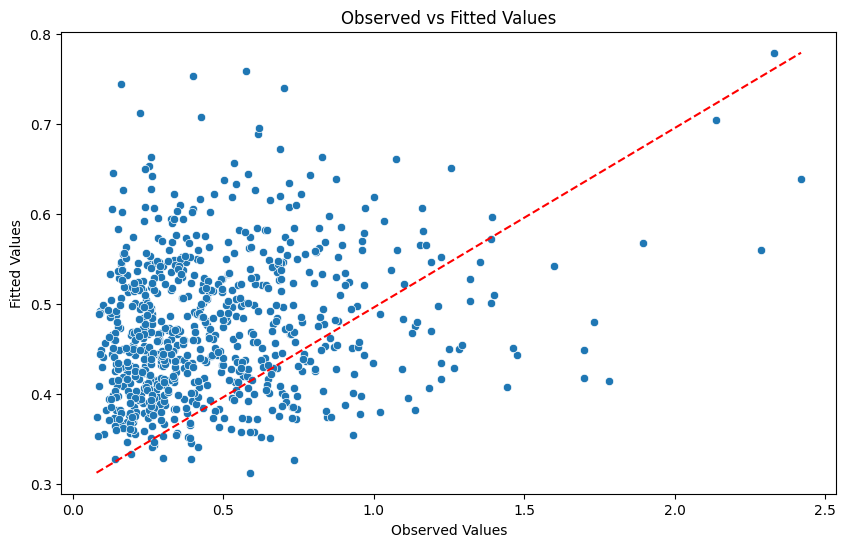

In [47]:
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['DiabetesPedigreeFunction'], y=fitted2)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df2['DiabetesPedigreeFunction']), max(df2['DiabetesPedigreeFunction'])], [min(fitted2), max(fitted2)], color='red', linestyle='--')
plt.show()

In [61]:
### Assessing normality of the residuals
# Insignificant p-value indicates normal distribution
W, p_value = shapiro(residuals2)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.8643614053726196, p-value=3.2023263640384306e-25


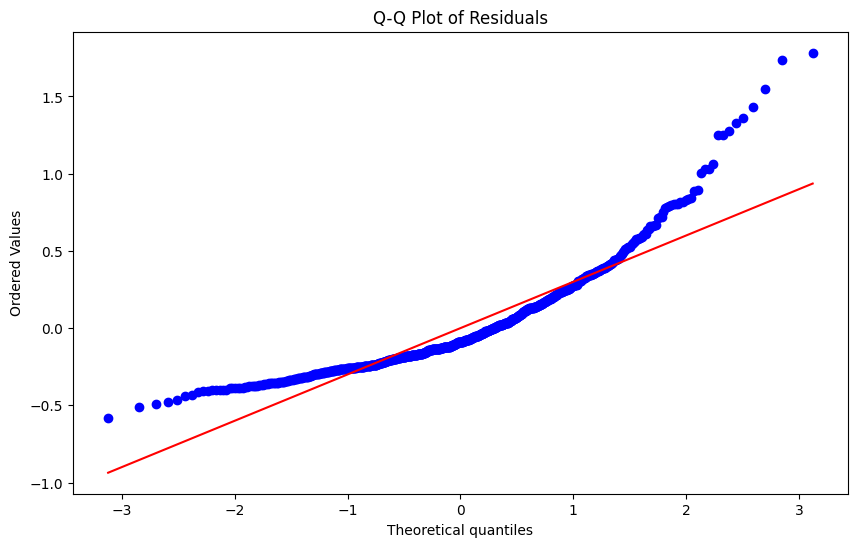

In [60]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals2, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [62]:
##### Assessing the homogeneity of variance of the residuals
gq_test2 = het_goldfeldquandt(residuals2, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test2[0]}, p-value={gq_test2[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).


Goldfeld-Quandt Test: F-statistic=0.8266226204740766, p-value=0.9680760433819965


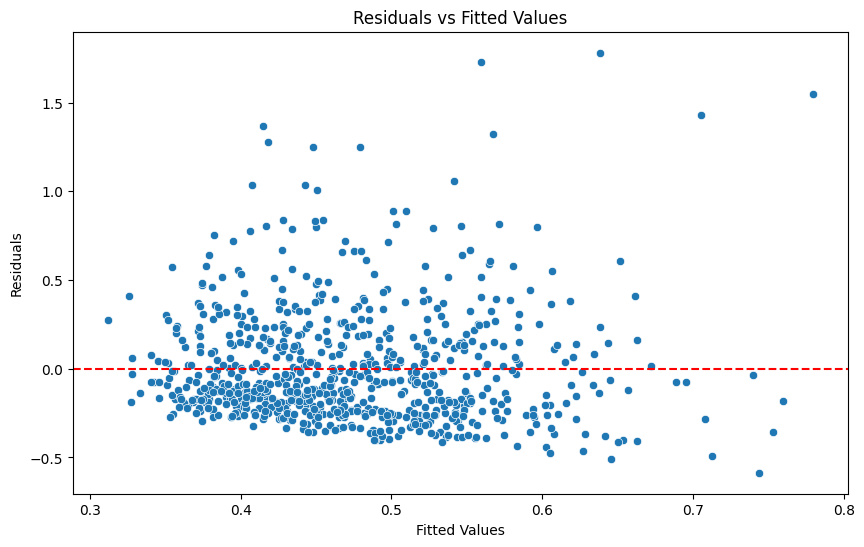

In [51]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted2, y=residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [63]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)
# VIF <10 indicates minimal collinearity



VIF Data:
        Variable        VIF
0          const  17.893785
1        Glucose   1.135380
2  SkinThickness   1.249002
3        Insulin   1.398442


In [64]:
dw_result = durbin_watson(results.resid)
print(f"Durbin-Watson Statistic: {dw_result}")
#Dubin-Watson test to check independence of residuals
#Values between 1.5 and 2.5 are acceptable

Durbin-Watson Statistic: 2.0177519984712435


### Model Evaluation

R-squared: 5.6%
- Indicates that 5.6% of the variance in Diabetes Pedigree Function (dependent variable) can be explained by Glucose, SkinThickness and Insulin (independent variables)

Discuss the model's adequacy in predicting the dependent variable:
- Linearity: insiginifant p-value indicates linearity (pass)
- Normality: signifiant p-value indicates an abnormal distribution (fail)
- Homogeneity: insignifiant p-value indicates homoscedasticity (pass)
- Multicollinearity: minimal mulicollinearity (pass)
- Independence of Residuals: residuals are independent (pass)

Conclusion: Based on the assumptions (1/5 tests failed), we may consider this test to be accurate.

### Insights



Dataset and variable selection:
- The dataset chosen contains several variables that may contribute to a person contracting diabetes (diabetes pedigree function)
- Diabetes Pedigree Function is the dependent variable
- Glucose, Skin Thickness and Insulin levels are all factors that can potentially impact diabetes diagnosis. These are all indepenent variables.


Insights and patterns observed:
- Insulin can also potentially be dropped from the model, as the p-value is not significant
- Blood Pressure was dropped from the model to avoid negatively influencing the results, however there was only a minor change in the adjustd R-squared value


No challenges faced during this analysis